Project Domain: Forecasting System

In [2]:
import numpy as np
import pandas as pd
from pandas import Series ,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 10, 6

In [3]:
import warnings
warnings.filterwarnings('ignore')

# DATA DESCRIPTION

Input data into python

Display 5 rows of data

In [4]:
train_data=pd.read_csv('train.csv')
train_data.head()

,date,store,item,sales
0,01-01-2013,1,1,13
1,02-01-2013,1,1,11
2,03-01-2013,1,1,14
3,04-01-2013,1,1,13
4,05-01-2013,1,1,10


In [6]:
test_data=pd.read_csv("test (3) (1).csv")
test_data.head()

,id,date,store,item
0,0,01-01-2018,1,1
1,1,02-01-2018,1,1
2,2,03-01-2018,1,1
3,3,04-01-2018,1,1
4,4,05-01-2018,1,1


Basic summary of the dataset for numerical variables

In [7]:
train_data.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [8]:
test_data.describe()

,id,store,item
count,45000.000000,45000.000000,45000.00000
mean,22499.500000,5.500000,25.50000
std,12990.525394,2.872313,14.43103
min,0.000000,1.000000,1.00000
25%,11249.750000,3.000000,13.00000
50%,22499.500000,5.500000,25.50000
75%,33749.250000,8.000000,38.00000
max,44999.000000,10.000000,50.00000


Basic information of the data

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45000 non-null  int64 
 1   date    45000 non-null  object
 2   store   45000 non-null  int64 
 3   item    45000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ MB


Dimension of the dataset

In [11]:
train_data.shape

(913000, 4)

In [12]:
test_data.shape

(45000, 4)

In [13]:
#The above dataset satisfies the condition given regarding data set dimensions

Datatypes of the columns

In [13]:
train_data.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

In [14]:
test_data.dtypes

id        int64
date     object
store     int64
item      int64
dtype: object

In [15]:
train_data.dtypes.value_counts()

int64     3
object    1
dtype: int64

In [16]:
test_data.dtypes.value_counts()

int64     3
object    1
dtype: int64

In [18]:
#Here we can see that there are 4 numerical variables in both train and test dataset.

In [17]:
train_data.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [18]:
test_data.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [19]:
train_data.isna().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [20]:
test_data.isna().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [21]:
train_data.apply(lambda x:len(x.unique()))

date     1826
store      10
item       50
sales     213
dtype: int64

In [22]:
test_data.apply(lambda x:len(x.unique()))

date     1826
store      10
item       50
sales     213
dtype: int64

Check for duplicate values in dataset

In [23]:
duplicate=train_data[train_data.duplicated()]
duplicate.shape

(0, 4)

In [24]:
duplicate=test_data[test_data.duplicated()]
duplicate.shape

(0, 4)

In [25]:
#There are no duplicate rows in both test and train dataset

# Exploratory Data Analysis

Univariate analysis and Bivariate analysis We will do the univariate analysis of each column feature and also the bivariate analysis of each column feature with the target

Basic summary of the dataset

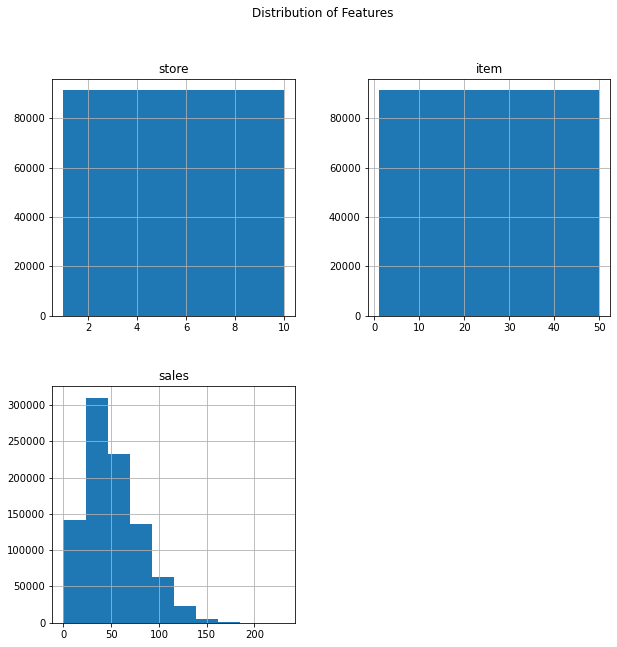

In [26]:
train_data.hist(figsize=(10,10))
plt.suptitle('Distribution of Features')
plt.show()

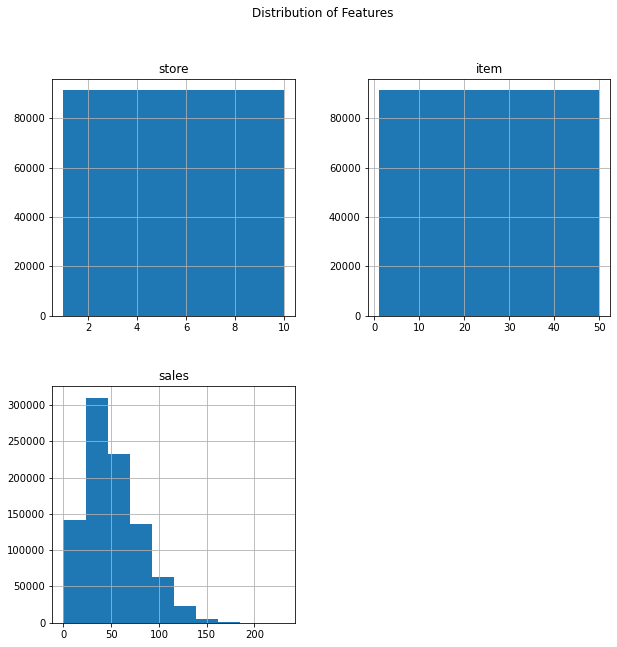

In [27]:
test_data.hist(figsize=(10,10))
plt.suptitle('Distribution of Features')
plt.show()

In [28]:
#The above is a basic summary of the data set
#Now we will do the visual analysis of each of the features

we will now plot for all the column features using a for loop

Distribution of  date


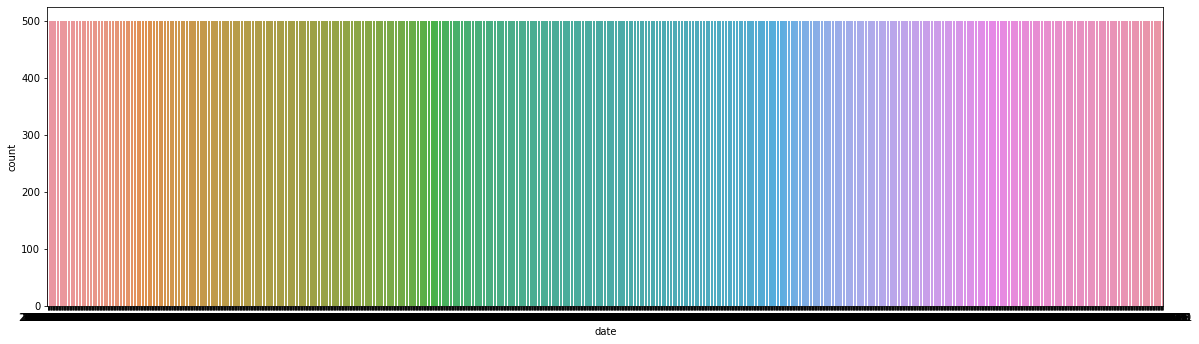

Distribution of  store


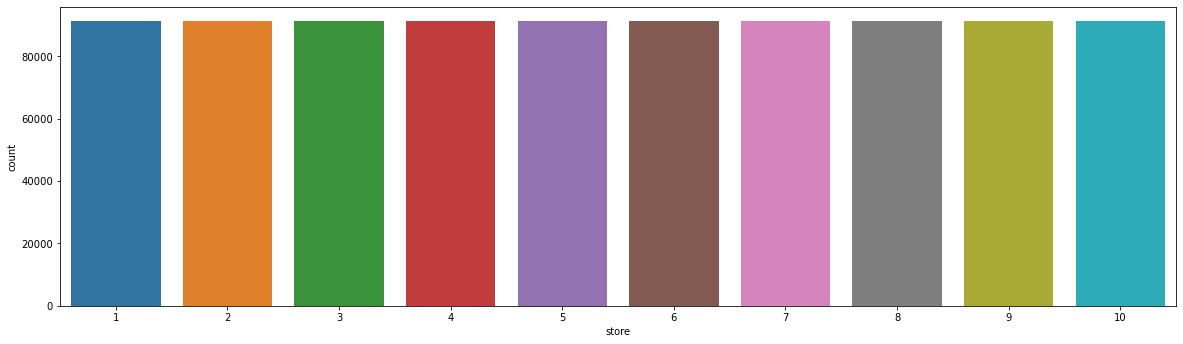

Distribution of  item


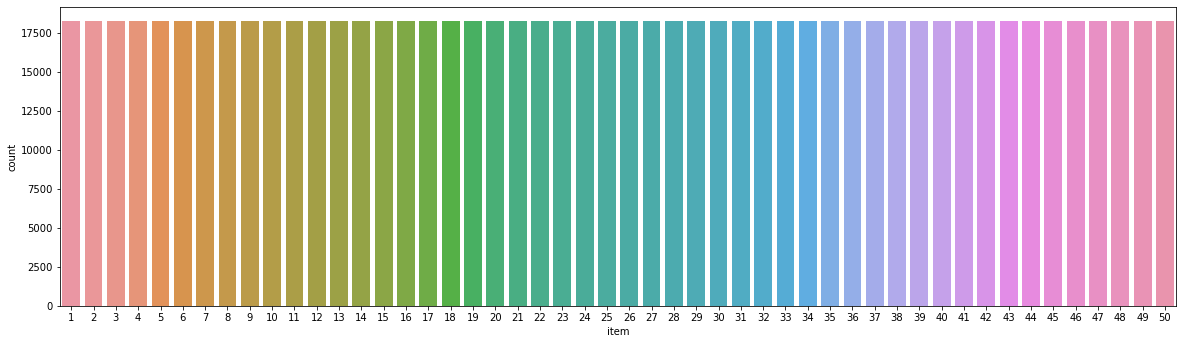

Distribution of  sales


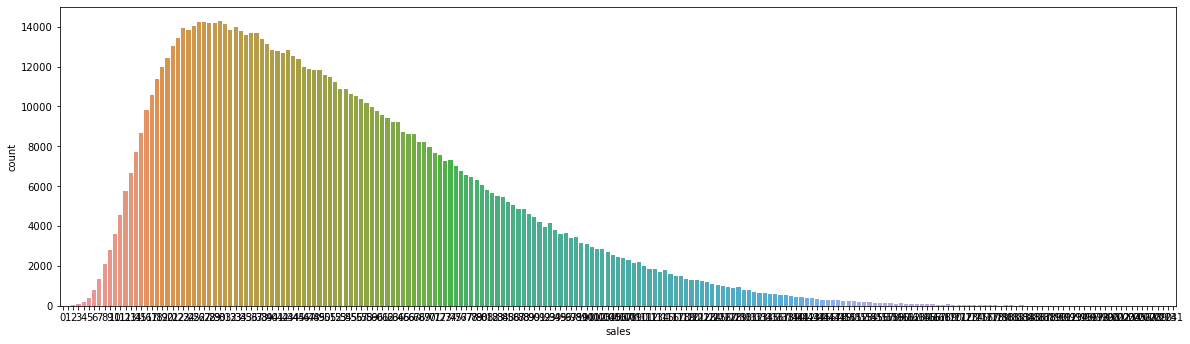

In [29]:
columns = ['date', 'store', 'item', 'sales']

for i in columns:
    plt.figure(figsize=(20, 5.5))
    sns.countplot(x=train_data[i])
    print("Distribution of ",i )
    plt.show()

Distribution of  date


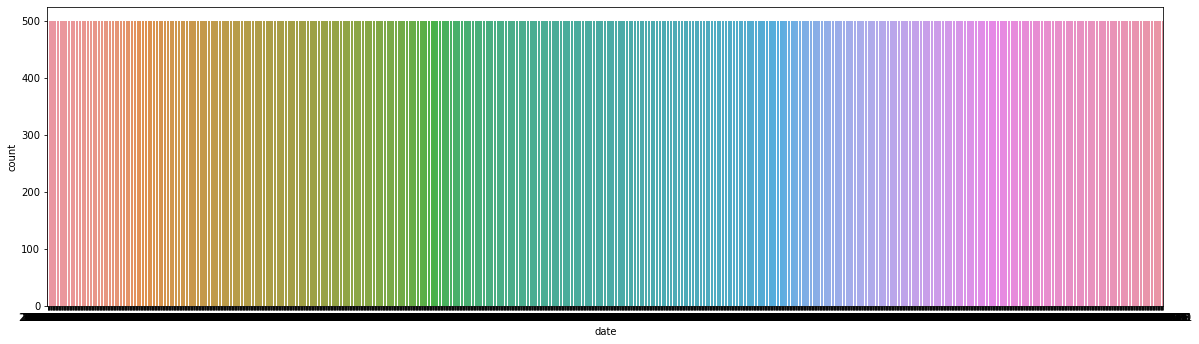

Distribution of  store


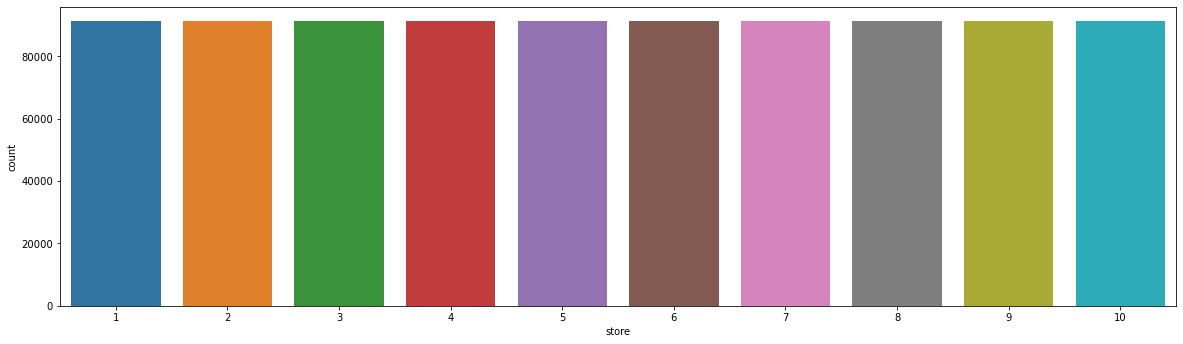

Distribution of  item


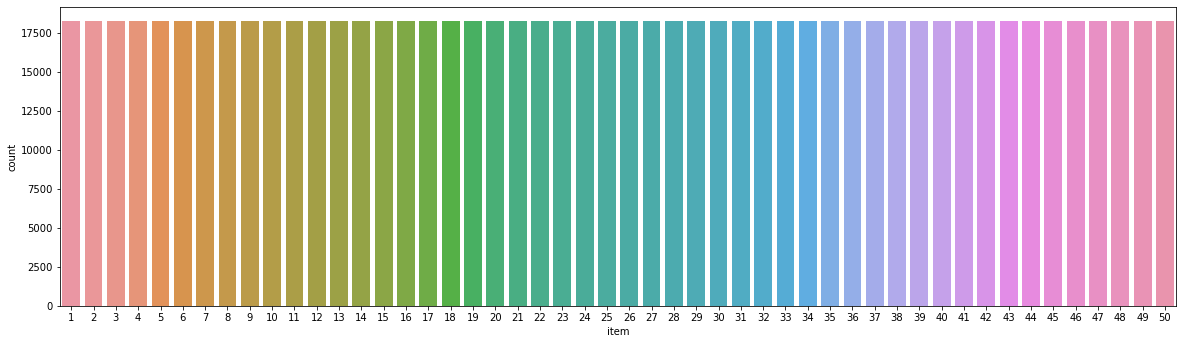

In [30]:
columns = ['date', 'store', 'item']

for i in columns:
    plt.figure(figsize=(20, 5.5))
    sns.countplot(x=test_data[i])
    print("Distribution of ",i )
    plt.show()

We will plot the features with respect to store.

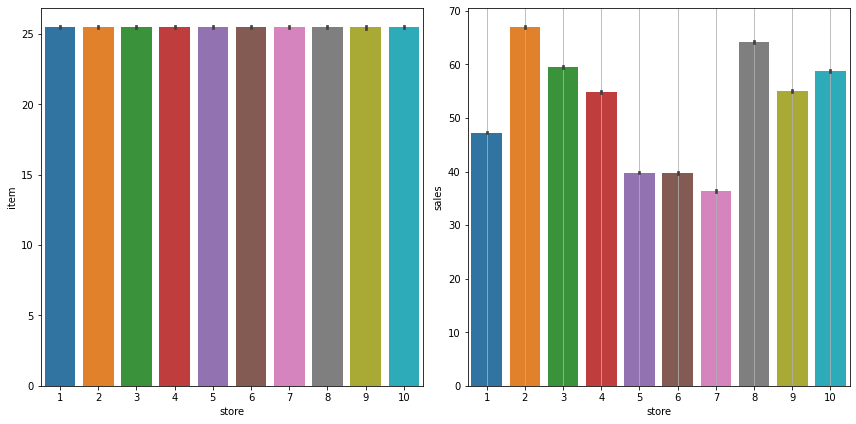

In [31]:
c=[ 'item', 'sales']
fig, ax = plt.subplots(1, 2, figsize=(12,6))

for i, subplot in zip(c,ax.flatten()):
    sns.barplot(x=train_data['store'], y= train_data[i], ax=subplot)
    plt.grid()
plt.tight_layout()

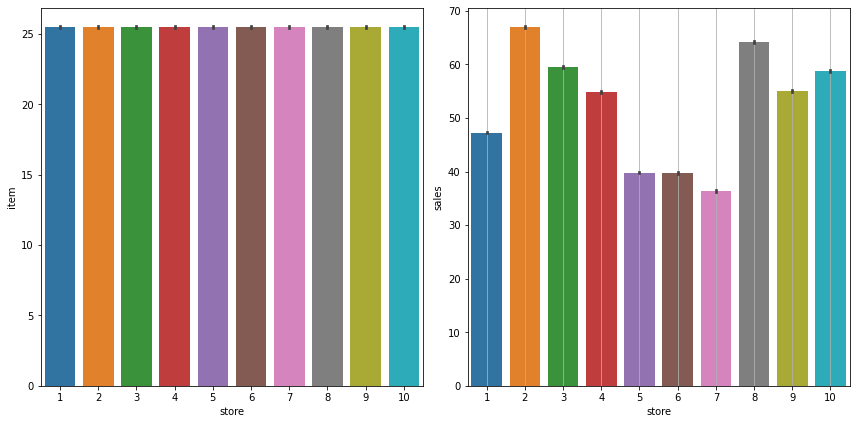

In [32]:
c=[ 'item', 'sales']
fig, ax = plt.subplots(1, 2, figsize=(12,6))

for i, subplot in zip(c,ax.flatten()):
    sns.barplot(x=test_data['store'], y= train_data[i], ax=subplot)
    plt.grid()
plt.tight_layout()

# Pre processing

1.Missing value handling

In [33]:
train_data.isnull().sum().to_frame().style.bar(color="red")

,0
date,0
store,0
item,0
sales,0


In [34]:
test_data.isnull().sum().to_frame().style.bar(color="red")

,0
date,0
store,0
item,0
sales,0


In [35]:
#Since there is no values are missing in both test and train dataset there is no need of handling the missing values.
#The dataset is free from null values. 

In [36]:
train_data.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

2.Outlier detection

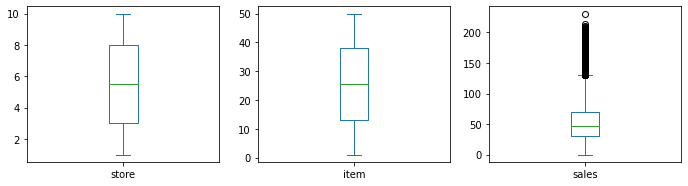

In [37]:
train_data.plot(kind="box",subplots=True,layout=(6,5),figsize=(20,20))
plt.show()

In [38]:
#Here we can see that only sales have outliers.

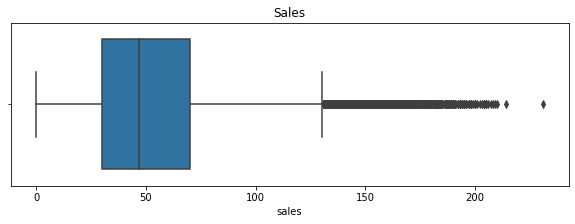

In [39]:
plt.figure(figsize=(10,3))
sns.boxplot(train_data['sales'])
plt.title('Sales')
plt.show()

In [40]:
q1=np.percentile(train_data['sales'],25,interpolation='midpoint')
q2=np.percentile(train_data['sales'],50,interpolation='midpoint')
q3=np.percentile(train_data['sales'],75,interpolation='midpoint')
iqr=q3-q1
up_lim=q3+1.5*iqr
low_lim=q1-1.5*iqr
print('\033[1;4m','Sales','\033[0m')
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
print('IQR:',iqr)
print('lower limit:',low_lim)
print('upper limit:',up_lim)
outlier=[]
for x in train_data['sales']:
    if ((x<low_lim) or (x>up_lim)):
        outlier.append(x)
    
train_data['sales']=np.where(train_data['sales']<low_lim,low_lim,np.where(train_data['sales']>up_lim,up_lim,train_data['sales']))
    
        

 Sales 
Q1: 30.0
Q2: 47.0
Q3: 70.0
IQR: 40.0
lower limit: -30.0
upper limit: 130.0


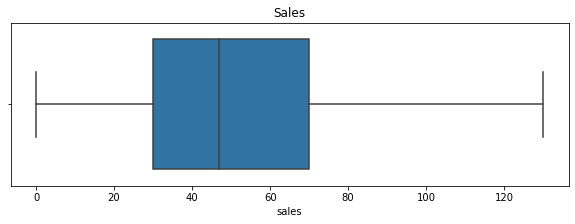

In [41]:
plt.figure(figsize=(10,3))
sns.boxplot(train_data['sales'])
plt.title('Sales')
plt.show()

In [42]:
#We can see that the outliers have been handled and have been set to the maximum value.

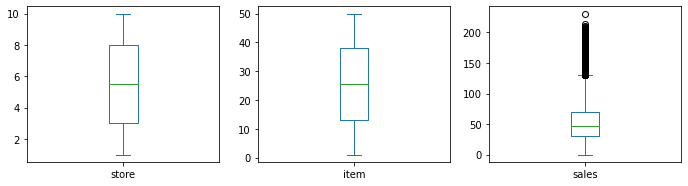

In [43]:
test_data.plot(kind="box",subplots=True,layout=(6,5),figsize=(20,20))
plt.show()

In [44]:
#It shows that there is no outliers in test dataset.
#Hence the outliers have been handled in both test and train dataset.

3.Feature reduction

In [45]:
train_data=train_data.drop(['store','item'],axis=1)

In [46]:
train_data.head()

,date,sales
0,2013-01-01,13.0
1,2013-01-02,11.0
2,2013-01-03,14.0
3,2013-01-04,13.0
4,2013-01-05,10.0


In [47]:
#converting 'date' object datatype to datetime datatype.
train_data['date']=pd.to_datetime(train_data['date'], errors='coerce', format='%Y-%m')
test_data['date']=pd.to_datetime(test_data['date'], errors='coerce', format='%Y-%m')

Converting the dataset into time series

In [48]:
my_series=train_data['sales'].squeeze()

In [49]:
type(my_series)

pandas.core.series.Series

In [50]:
train_data.set_index('date',inplace=True)

# Maximum Sales 2013-2017

Text(0, 0.5, 'sales')

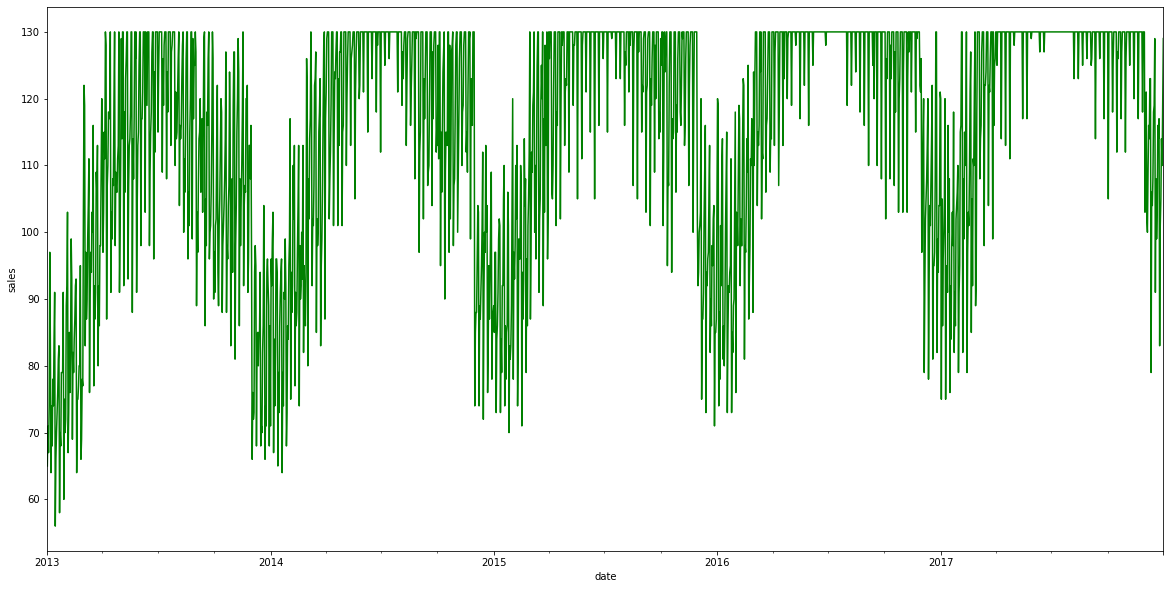

In [51]:
train_data['sales'].resample('D').max().plot(figsize=(20,10),c='green')
plt.ylabel('sales')

# Maximun sales of 2013

<AxesSubplot:xlabel='date'>

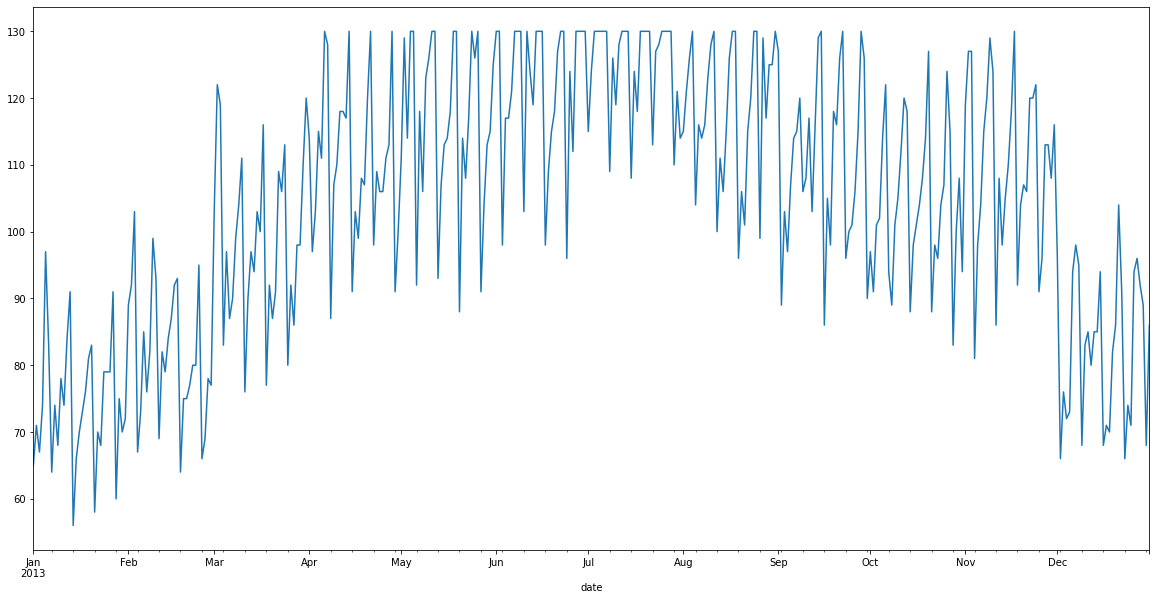

In [52]:
train_data['sales'].resample('D').max().loc['2013-01-01':'2013-12-31'].plot(figsize=(20,10))

# Maximum sales of 2014

<AxesSubplot:xlabel='date'>

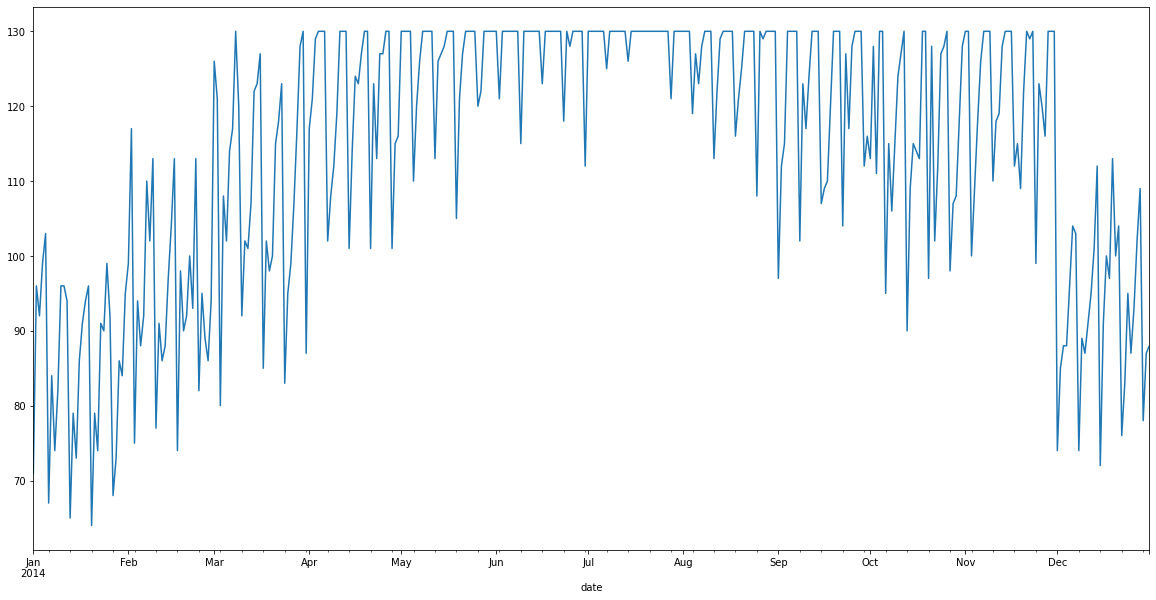

In [53]:
train_data['sales'].resample('D').max().loc['2014-01-01':'2014-12-31'].plot(figsize=(20,10))

# Maximum sales of 2015

<AxesSubplot:xlabel='date'>

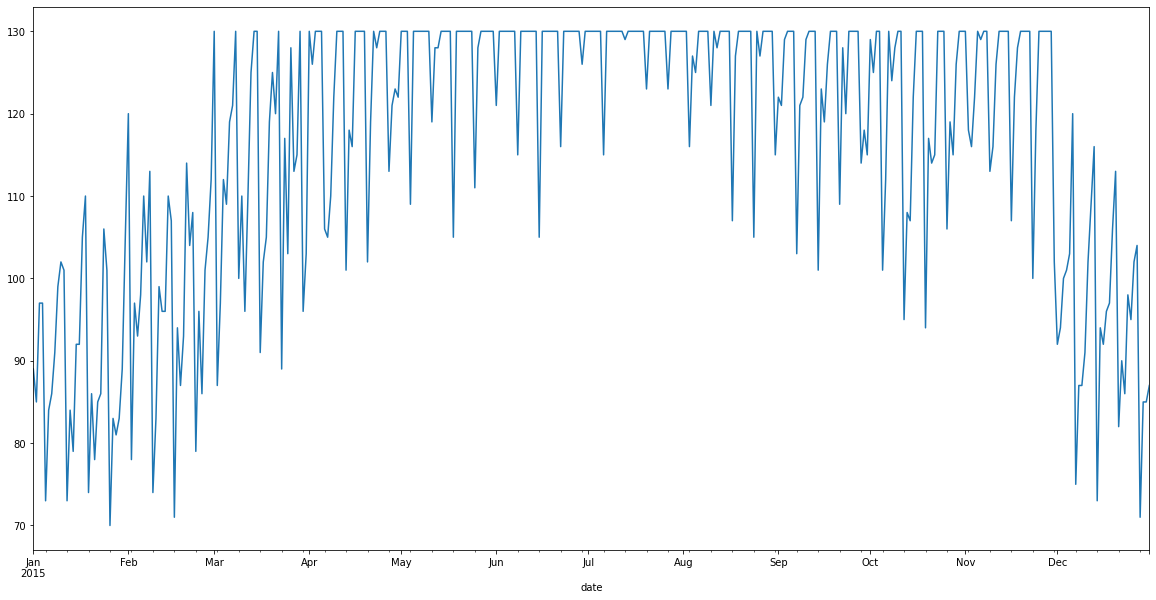

In [54]:
train_data['sales'].resample('D').max().loc['2015-01-01':'2015-12-31'].plot(figsize=(20,10))

# Maximum sales of 2016

<AxesSubplot:xlabel='date'>

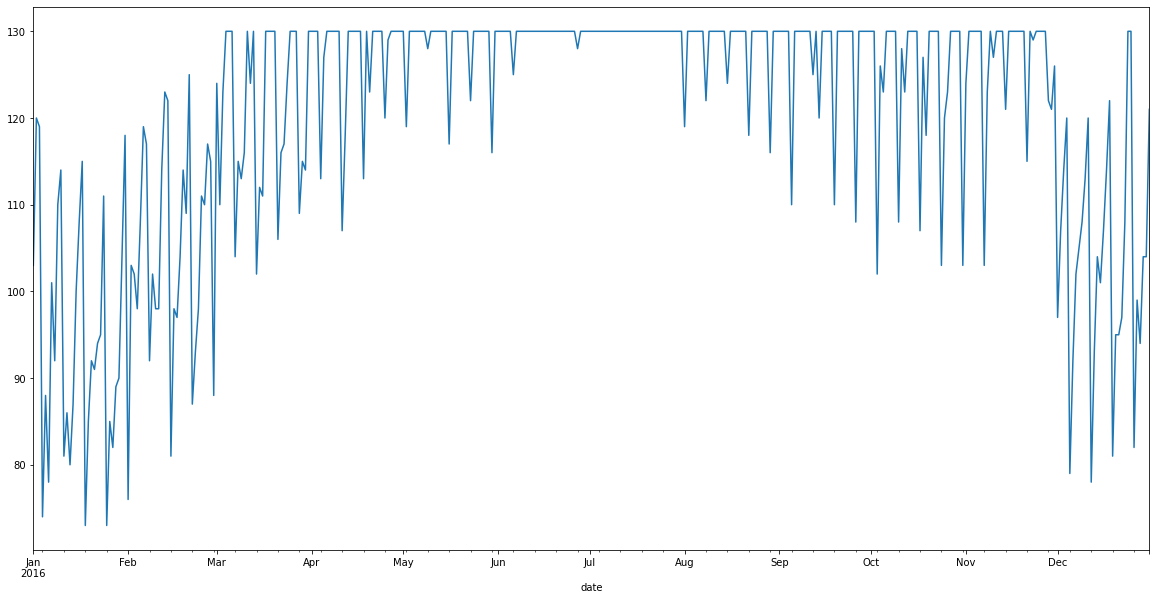

In [55]:
train_data['sales'].resample('D').max().loc['2016-01-01':'2016-12-31'].plot(figsize=(20,10))

# Maximum sales of 2017

<AxesSubplot:xlabel='date'>

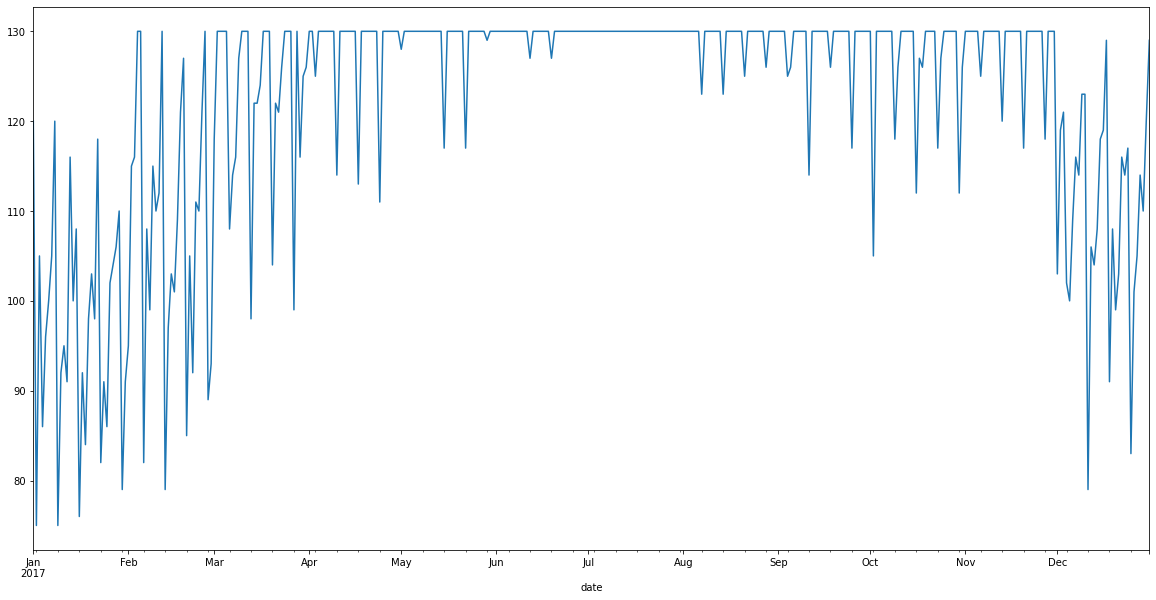

In [56]:
train_data['sales'].resample('D').max().loc['2017-01-01':'2017-12-31'].plot(figsize=(20,10))

<AxesSubplot:xlabel='date'>

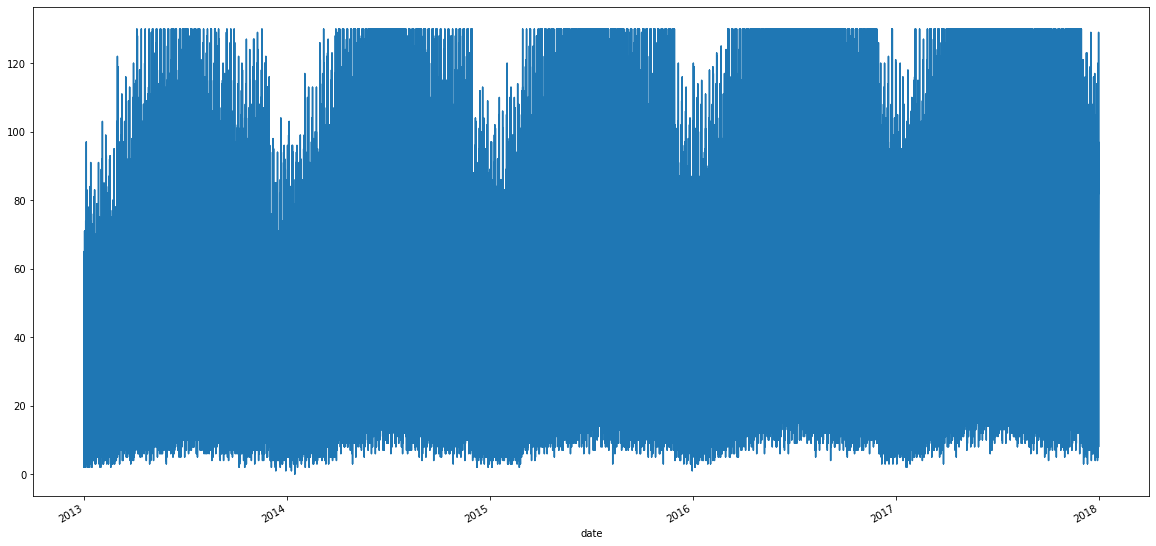

In [57]:
train_data['sales'].plot(figsize=(20,10))

<AxesSubplot:xlabel='date'>

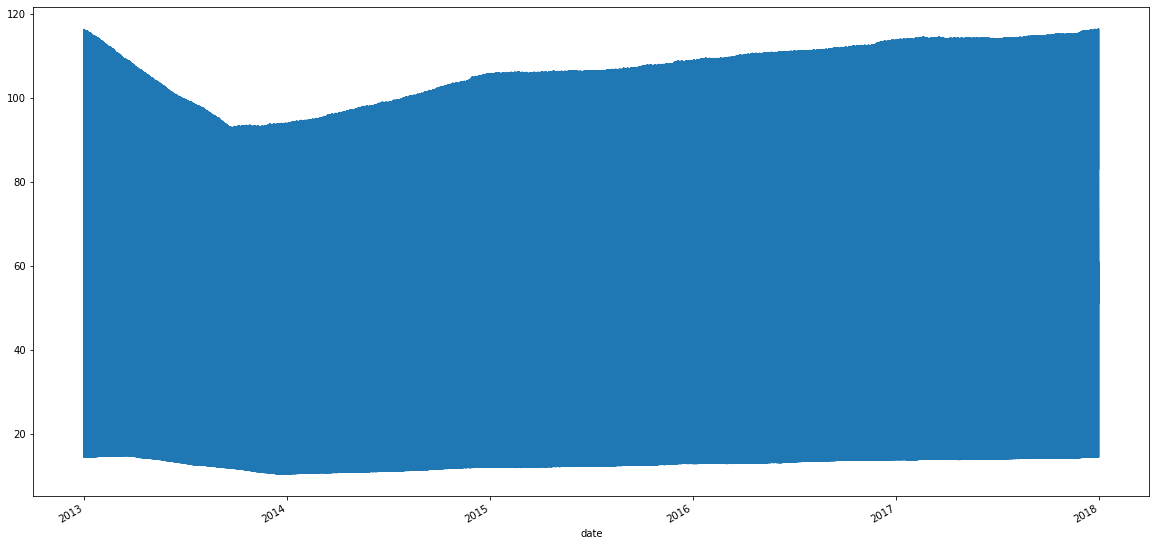

In [75]:
train_data['mov_avg'] =train_data['sales'].rolling(window=360).mean()
train_data['mov_avg'].dropna().plot(figsize=(20,10))

# Modelling


In [19]:
series=train_data['sales'].squeeze()
type(series)

pandas.core.series.Series

In [20]:
values=pd.DataFrame(series)

In [21]:
base_model=pd.concat([values,values.shift(1)],axis=1)

In [62]:
base_model.head()

,sales,sales
date,,
2013-01-01,13.0,NaN
2013-01-02,11.0,13.0
2013-01-03,14.0,11.0
2013-01-04,13.0,14.0
2013-01-05,10.0,13.0


In [63]:
base_model.columns=['Actual_sales','Forecasted_sales']

In [64]:
base_model.head()

,Actual_sales,Forecasted_sales
date,,
2013-01-01,13.0,NaN
2013-01-02,11.0,13.0
2013-01-03,14.0,11.0
2013-01-04,13.0,14.0
2013-01-05,10.0,13.0


In [65]:
base_model.dropna()

,Actual_sales,Forecasted_sales
date,,
2013-01-02,11.0,13.0
2013-01-03,14.0,11.0
2013-01-04,13.0,14.0
2013-01-05,10.0,13.0
2013-01-06,12.0,10.0
...,...,...
2017-12-27,63.0,41.0
2017-12-28,59.0,63.0
2017-12-29,74.0,59.0


In [66]:
base_test=base_model[1:]
base_test.head()

,Actual_sales,Forecasted_sales
date,,
2013-01-02,11.0,13.0
2013-01-03,14.0,11.0
2013-01-04,13.0,14.0
2013-01-05,10.0,13.0
2013-01-06,12.0,10.0


In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
base_error=mean_squared_error(base_test.Actual_sales,base_test.Forecasted_sales)
base_error

189.05599568017053

In [69]:
np.sqrt(base_error)

13.749763477244636

In [70]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

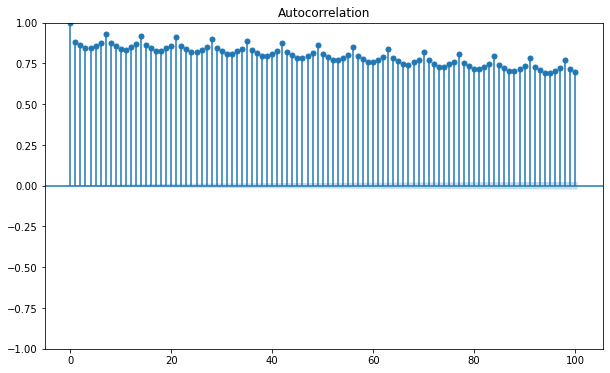

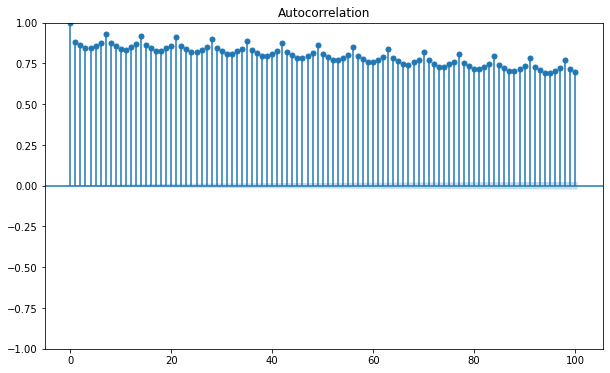

In [71]:
plot_acf(series,lags=100)

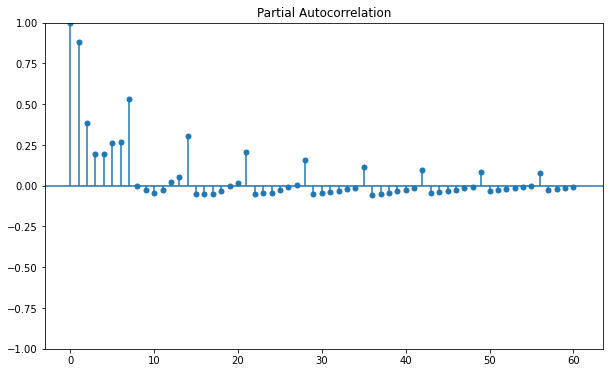

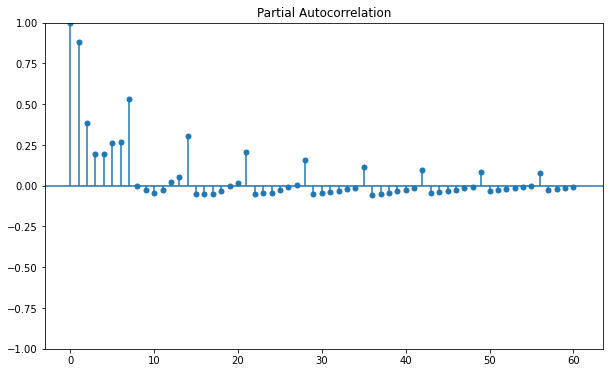

In [72]:
plot_pacf(series)

In [76]:
train_data.columns

Index(['sales', 'mov_avg'], dtype='object')

In [77]:
train_data=train_data.drop(['mov_avg'],axis=1)

In [78]:
test=train_data[0:225000]
train=train_data[225000:912999]

In [79]:
test.size

225000

In [81]:
import statsmodels.api as sm

In [82]:
model = sm.tsa.arima.ARIMA(train, order=(0,1,0))
result = model.fit()
result.summary()

C:\Users\Lavanya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lavanya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lavanya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lavanya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lavanya\anaconda3

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:               687999
Model:                 ARIMA(0, 1, 0)   Log Likelihood            -2776663.876
Date:                Fri, 23 Sep 2022   AIC                        5553329.752
Time:                        10:24:06   BIC                        5553341.193
Sample:                             0   HQIC                       5553332.949
                             - 687999                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       187.5119      0.232    809.687      0.000     187.058     187.966
===================================================================================
Ljung-Box (L1) (Q):              121466.97   Jarque-Bera (JB):            152239.24
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                            -0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
start=len(train)
end=len(train)+len(test)-1
pred=result.predict(start=start,end=end,typ='levels')
print(pred)

C:\Users\Lavanya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


687999    62.0
688000    62.0
688001    62.0
688002    62.0
688003    62.0
          ... 
912994    62.0
912995    62.0
912996    62.0
912997    62.0
912998    62.0
Name: predicted_mean, Length: 225000, dtype: float64


<AxesSubplot:xlabel='date'>

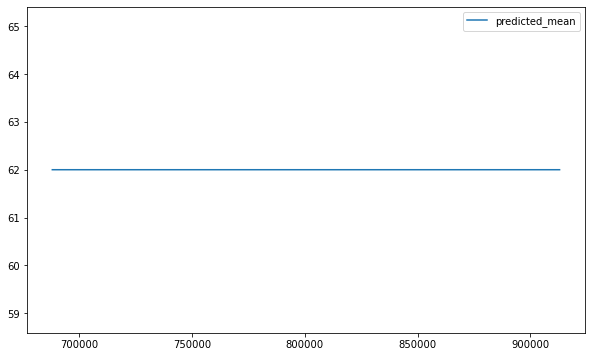

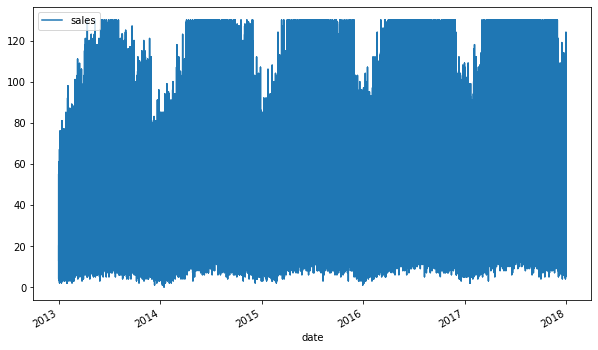

In [84]:
pred.plot(legend=True)
test.plot(legend=True)

In [85]:
test.mean()

sales    52.241351
dtype: float64

In [86]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(test,pred))
print(rmse)

29.906060924167196


In [90]:
from xgboost import XGBRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error



In [91]:
boston=load_boston()
x,y=boston.data,boston.target
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25)

In [93]:
xgbr=XGBRegressor(verbosity=0)
print(xgbr)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)


In [94]:
xgbr.fit(xtrain,ytrain)
score=xgbr.score(xtrain,ytrain)
print('Training score:',score)


Training score: 0.999997681152651


In [95]:
cv_score=cross_val_score(xgbr,xtrain,ytrain,cv=5)
print('CV mean score:',cv_score.mean())


CV mean score: 0.81148088141109


In [97]:
ypred=xgbr.predict(xtest)
mse=mean_squared_error(ytest,ypred)
print('MSE:',mse)
print('RMSE:',mse*(1/2))

MSE: 10.533393674993377
RMSE: 5.2666968374966885


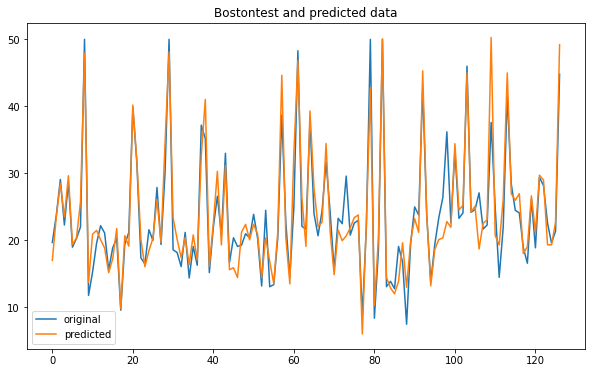

In [98]:
x_ax=range(len(ytest))
plt.plot(x_ax,ytest,label='original')
plt.plot(x_ax,ypred,label='predicted')
plt.title('Bostontest and predicted data')
plt.legend()
plt.show()